<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-分类变量预处理" data-toc-modified-id="1-分类变量预处理-1">1 分类变量预处理</a></span><ul class="toc-item"><li><span><a href="#1.1-分类变量的缺失值和异常值处理" data-toc-modified-id="1.1-分类变量的缺失值和异常值处理-1.1">1.1 分类变量的缺失值和异常值处理</a></span><ul class="toc-item"><li><span><a href="#1.1.1-分类变量的缺失值处理" data-toc-modified-id="1.1.1-分类变量的缺失值处理-1.1.1">1.1.1 分类变量的缺失值处理</a></span></li><li><span><a href="#1.1.2-分类变量的异常值处理" data-toc-modified-id="1.1.2-分类变量的异常值处理-1.1.2">1.1.2 分类变量的异常值处理</a></span></li></ul></li><li><span><a href="#1.2-分类变量取值个数处理" data-toc-modified-id="1.2-分类变量取值个数处理-1.2">1.2 分类变量取值个数处理</a></span></li></ul></li><li><span><a href="#2-数值变量预处理" data-toc-modified-id="2-数值变量预处理-2">2 数值变量预处理</a></span><ul class="toc-item"><li><span><a href="#2.1-数值变量的缺失值和异常值处理" data-toc-modified-id="2.1-数值变量的缺失值和异常值处理-2.1">2.1 数值变量的缺失值和异常值处理</a></span><ul class="toc-item"><li><span><a href="#2.1.1-数值变量的缺失值处理" data-toc-modified-id="2.1.1-数值变量的缺失值处理-2.1.1">2.1.1 数值变量的缺失值处理</a></span></li><li><span><a href="#2.1.2-数值变量的异常值处理" data-toc-modified-id="2.1.2-数值变量的异常值处理-2.1.2">2.1.2 数值变量的异常值处理</a></span></li></ul></li><li><span><a href="#2.2-数值属性预处理" data-toc-modified-id="2.2-数值属性预处理-2.2">2.2 数值属性预处理</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
plt.rcParams['font.family']=['Songti SC']
plt.rcParams['axes.unicode_minus'] = False
# pd.set_option('precision', 5) #设置精度
pd.set_option('display.float_format', lambda x: '%.5f' % x) #为了直观的显示数字，不采用科学计数法
pd.options.display.max_rows = 200 #最多显示200行

In [2]:
df = pd.read_csv("../data/Credit.csv", dtype = {"Label":'category', 'GENDER':'category', 'MARITAL_STATUS':'category', "LOANTYPE":"category", "PAYMENT_TYPE":"category", 'ID':'category','AGE':'int'} )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 12 columns):
ID                             1412 non-null category
Label                          1412 non-null category
AGE                            1412 non-null int64
GENDER                         1412 non-null category
MARITAL_STATUS                 1412 non-null category
MONTHLY_INCOME_WHITHOUT_TAX    1402 non-null float64
LOANTYPE                       1412 non-null category
GAGE_TOTLE_PRICE               1412 non-null float64
APPLY_AMOUNT                   1412 non-null float64
APPLY_TERM_TIME                1412 non-null int64
APPLY_INTEREST_RATE            1412 non-null float64
PAYMENT_TYPE                   1412 non-null category
dtypes: category(6), float64(4), int64(2)
memory usage: 127.3 KB


# 1 分类变量预处理

In [3]:
df.select_dtypes(include=['category']).describe()

,ID,Label,GENDER,MARITAL_STATUS,LOANTYPE,PAYMENT_TYPE
count,1412,1412,1412,1412,1412,1412
unique,1412,2,2,4,2,2
top,999,0,Male,Married,Frist-Hand,Average_Capital_Plus_Interest_Repayment
freq,1,762,782,751,1117,1120


In [4]:
df.GENDER.value_counts(normalize=True)

Male     0.55382
Female   0.44618
Name: GENDER, dtype: float64

In [6]:
df.MARITAL_STATUS.value_counts(normalize=True)

Married   0.53187
Single    0.35127
Unknown   0.10269
Divorce   0.01416
Name: MARITAL_STATUS, dtype: float64

In [5]:
df.LOANTYPE.value_counts(normalize=True)

Frist-Hand    0.79108
Second-Hand   0.20892
Name: LOANTYPE, dtype: float64

In [7]:
df.PAYMENT_TYPE.value_counts(normalize=True)

Average_Capital_Plus_Interest_Repayment   0.79320
Matching_The_Principal_Repayment          0.20680
Name: PAYMENT_TYPE, dtype: float64

## 1.1 分类变量的缺失值和异常值处理
- GENDER：性别，2类，男、女
- MARITAL_STATUS：婚姻状态，4类，已婚、单身、离婚、未知
- LOANTYPE：贷款类型，2类，一手、二手
- PAYMENT_TYPE：还款方式，2类，带利息、先还本金
### 1.1.1 分类变量的缺失值处理
数据集中只有4个分类属性，且只有MARITAL_STATUS中有缺失值Unknown，占比10.269%，我们不删除该属性，将Unknown单独作为一类。

### 1.1.2 分类变量的异常值处理
没有异常值

## 1.2 分类变量取值个数处理
目的：使得每个分类属性的取值都不超过5个  

1. 检查删除
- 所有分类属性不存在某个取值占了90%以上，所以没因此删除属性
- 所有分类属性不存在缺失值或者异常值占了50%以上，所以没因此删除属性
- 分类属性只有2种取值，且这两种取值的odds又相等，则对违约分类无区分作用，所以要删除这种属性。下面来检查这种情况，性别、贷款类型、还款类型都是只有2种取值，经过检查，发现两个取值的odds都不相等，所以不用删除。

In [8]:
#输入一个2值属性，判断要不要根据odds值删除它
def check_delete_odds_equal(df,feature):
    print(f"对于属性{feature}：")
    for i in df[feature].value_counts().index:
        print(f"取值 {i} 的odds = {value_odds(df,feature,i)}")
    print("odds相等，需要删除属性" if (df[feature].value_counts().index[0] == df[feature].value_counts().index[1]) else "odds不等，不用删除属性")
    print("\n")

In [9]:
#输入一个属性的一个取值，可以得到该值对应的odds，我认为1是违约
def value_odds(df,feature,value):
    p = (df.loc[(df[feature] == value) & (df['Label'] == "1")].shape[0]) / df.shape[0] #p: bad ratio
    odds = p/(1-p)
    return odds

In [10]:
bin_feature_list = ["GENDER","LOANTYPE","PAYMENT_TYPE"]
for i in bin_feature_list:
    check_delete_odds_equal(df,i)

对于属性GENDER：
取值 Male 的odds = 0.3183940242763772
取值 Female 的odds = 0.28014505893019037
odds不等，不用删除属性


对于属性LOANTYPE：
取值 Frist-Hand 的odds = 0.5533553355335534
取值 Second-Hand 的odds = 0.11620553359683795
odds不等，不用删除属性


对于属性PAYMENT_TYPE：
取值 Average_Capital_Plus_Interest_Repayment 的odds = 0.5584988962472406
取值 Matching_The_Principal_Repayment 的odds = 0.11356466876971609
odds不等，不用删除属性




2. 检查合并
- 分类属性中某个取值占比小于5%时，要与odds相近的取值合并成一类，直至每个取值占比大于5%。  
数据集里只有婚姻状态的Divorce取值低于5%，所以接下来找出Married、Single、Unknown这三个取值中与Divorce的odds最近的那个。下面的结果表示Unknown与Divorce的odds最接近，所以将二者并成一类，新类Unknown_Divorce的占比超过了5%，故停止合并。

In [11]:
def check_merge_odds_nearest(df,feature,value):
    opt = value_odds(df,feature,value)
    print(f"待合并值 {value} 的odds = {opt}")
    for i in df[feature].value_counts().index:
        if i == value:
            continue
        optt = value_odds(df,feature,i)
        print(f"取值 {i} 的odds = {optt}，距离是{abs(optt-opt)}")

In [12]:
check_merge_odds_nearest(df,"MARITAL_STATUS","Divorce")

待合并值 Divorce 的odds = 0.009292351679771264
取值 Married 的odds = 0.3208606173994388，距离是0.3115682657196675
取值 Single 的odds = 0.18955349620893008，距离是0.1802611445291588
取值 Unknown 的odds = 0.05137751303052867，距离是0.042085161350757405


In [13]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].apply(lambda x: "Unknown_Divorce" if (x == "Unknown" or x == "Divorce") else x)

In [14]:
df.MARITAL_STATUS.value_counts(normalize=True)

Married           0.53187
Single            0.35127
Unknown_Divorce   0.11686
Name: MARITAL_STATUS, dtype: float64

- 继续检查合并，若属性中取值个数大于2，且其中某两个取值的odds相等，则需要将相等odds的取值归为一类。  
我们这里就只有属性婚姻状态取值个数大于2，那么就检查它的三个取值的odds有没有相等的情况，有就进行合并。从下面的输出结果可看出没有取值的odds相等，所以不合并。

In [15]:
print("对于属性 MARITAL_STATUS：")
for i in df["MARITAL_STATUS"].value_counts().index:
        print(f"取值 {i} 的odds = {value_odds(df,'MARITAL_STATUS',i)}")

对于属性 MARITAL_STATUS：
取值 Married 的odds = 0.3208606173994388
取值 Single 的odds = 0.18955349620893008
取值 Unknown_Divorce 的odds = 0.061654135338345864


最后，把所有字符串取值都变成数字形式方便输入模型

In [16]:
df.MARITAL_STATUS.replace(["Single","Unknown_Divorce","Married"],[0,1,2],inplace=True)
df.GENDER.replace(["Female","Male"],[0,1],inplace=True)
df.LOANTYPE.replace(["Frist-Hand","Second-Hand"],[0,1],inplace=True)
df.PAYMENT_TYPE.replace(["Average_Capital_Plus_Interest_Repayment","Matching_The_Principal_Repayment"],[0,1],inplace=True)

# 2 数值变量预处理

In [18]:
df.describe()

,AGE,GENDER,MARITAL_STATUS,MONTHLY_INCOME_WHITHOUT_TAX,LOANTYPE,GAGE_TOTLE_PRICE,APPLY_AMOUNT,APPLY_TERM_TIME,APPLY_INTEREST_RATE,PAYMENT_TYPE
count,1412.00000,1412.00000,1412.00000,1402.00000,1412.00000,1412.00000,1412.00000,1412.00000,1412.00000,1412.00000
mean,33.66643,0.55382,1.18059,730195.95822,0.20892,881278.57175,446515.58074,208.98017,5.12764,0.20680
std,7.17158,0.49727,0.92257,22385106.02736,0.40668,838376.52789,415384.29148,81.33076,0.95455,0.40515
min,18.00000,0.00000,0.00000,0.00000,0.00000,118165.00000,60000.00000,60.00000,1.89780,0.00000
25%,28.00000,0.00000,0.00000,6000.00000,0.00000,450974.25000,260000.00000,120.00000,4.15800,0.00000
50%,33.00000,1.00000,2.00000,8500.00000,0.00000,701432.00000,360000.00000,240.00000,5.04900,0.00000
75%,38.00000,1.00000,2.00000,15000.00000,0.00000,1023007.05000,500000.00000,240.00000,6.04350,0.00000
max,67.00000,1.00000,2.00000,833333333.30000,1.00000,12230958.96000,7120000.00000,360.00000,8.69280,1.00000


## 2.1 数值变量的缺失值和异常值处理
- AGE：年龄
- MONTHLY_INCOME_WHITHOUT_TAX：税前月收入，单位元
- GAGE_TOTLE_PRICE：抵押品的总价值，单位元
- APPLY_AMOUNT：申请的贷款金额，单位元  
- APPLY_TERM_TIME：申请的还款时长，单位月
- APPLY_INTEREST_RATE：贷款利率，百分数

### 2.1.1 数值变量的缺失值处理
数据集中有6个数值变量，其中只有MONTHLY_INCOME_WHITHOUT_TAX统计出的数目比总样本个数少，说明有缺失值，我们进行查看，发现缺失值占0.7%，于是我们决定将缺失值单独归类为-1，并最终要将该属性进行离散化

In [17]:
df.MONTHLY_INCOME_WHITHOUT_TAX.isna().value_counts(normalize=True)

False   0.99292
True    0.00708
Name: MONTHLY_INCOME_WHITHOUT_TAX, dtype: float64

In [19]:
df.MONTHLY_INCOME_WHITHOUT_TAX.fillna(-1,inplace=True)

### 2.1.2 数值变量的异常值处理

异常的定义需要结合专业知识和常识，我们觉得每个客户的GAGE_TOTLE_PRICE都应该大于APPLY_AMOUNT，如果不是，说明其中登记有误。
下面进行检查，发现所有客户都符合抵押价值大于贷款值，故认为GAGE_TOTLE_PRICE和APPLY_AMOUNT都无误。  


In [20]:
df[df.GAGE_TOTLE_PRICE > df.APPLY_AMOUNT].shape[0]

1412

年龄和贷款时间长度、利率也都正常，最大值和最小值都符合常识。  
税前月收入，除了1.2.1中已经提到有缺失值，我们还发现最大值上亿，最小值为0。最小值0我们暂时理解为收集数据时该客户没有月收入，但是最大值我们认为是异常的，要进行观察。  
我们发现top 25%的客户税前月收入超过15000，所以我们先观察税前月收入超过15000的客户，有多少异常的。  
我们发现异常的主要是月收入超过1000000的，如5833333.33300、12500000.00000、8333333.33300、28129588.00000、833333333.30000、83789551.00000、6666666.66700、5000000.00000。我们认为要结合其抵押价值和贷款金额来综合查看该数据是否异常。

In [22]:
df[df.MONTHLY_INCOME_WHITHOUT_TAX>15000].MONTHLY_INCOME_WHITHOUT_TAX.value_counts()

20000.00000        57
25000.00000        28
18000.00000        23
30000.00000        21
50000.00000        19
16000.00000        14
35000.00000        10
40000.00000         8
60000.00000         8
19000.00000         7
28000.00000         7
150000.00000        6
21000.00000         6
80000.00000         6
100000.00000        5
26000.00000         5
22000.00000         5
27000.00000         4
17000.00000         4
45000.00000         4
23000.00000         4
70000.00000         3
36000.00000         3
200000.00000        2
1000000.00000       2
33000.00000         2
24000.00000         2
25500.00000         2
5833333.33300       2
12500000.00000      2
18800.00000         2
300000.00000        2
29000.00000         2
44000.00000         2
24400.00000         1
116000.00000        1
8333333.33300       1
18178.00000         1
15600.00000         1
126000.00000        1
21680.00000         1
65000.00000         1
22500.00000         1
58000.00000         1
66666.66667         1
16500.0000

如下，我们发现很多月入“千万”、“百万”级别的客户，抵押品价值只有几十万，贷款也是几十万甚至几万，与“身家”不符，所以我们认为这些客户的月收入填写异常。  
如果不删除这部分客户，那就另存为一类-2。

In [21]:
df[df.MONTHLY_INCOME_WHITHOUT_TAX >= 1000000]

,ID,Label,AGE,GENDER,MARITAL_STATUS,MONTHLY_INCOME_WHITHOUT_TAX,LOANTYPE,GAGE_TOTLE_PRICE,APPLY_AMOUNT,APPLY_TERM_TIME,APPLY_INTEREST_RATE,PAYMENT_TYPE
36,37,0,34,1,0,28129588.00000,0,301894.26000,60000.00000,60,4.89600,0
72,73,1,39,1,2,5000000.00000,0,492303.00000,390000.00000,60,5.26500,0
86,87,0,43,1,2,12500000.00000,1,600994.00000,400000.00000,60,4.89600,0
527,528,0,34,1,2,5833333.33300,0,975562.68000,350000.00000,180,4.15800,0
733,734,0,26,0,0,83789551.00000,0,1194326.74000,460000.00000,240,4.15800,0
765,766,0,27,1,2,6666666.66700,0,1114920.06000,510000.00000,240,4.15800,0
1114,1115,0,41,0,0,8333333.33300,0,546843.69000,230000.00000,240,5.10840,0
1147,1148,1,43,1,2,1000000.00000,1,228656.00000,120000.00000,240,6.84000,0
1148,1149,1,43,1,2,1000000.00000,1,228594.00000,120000.00000,240,6.84000,0
1233,1234,0,41,1,1,833333333.30000,0,4300271.28000,1770000.00000,300,5.04900,0


In [23]:
df["MONTHLY_INCOME_WHITHOUT_TAX"] = df["MONTHLY_INCOME_WHITHOUT_TAX"].apply(lambda x: -2 if x >= 1000000 else x)

## 2.2 数值属性预处理
目的：数值属性离散化，离散化后取值不超过5个

In [24]:
def find_best_k(feature,max_k):
    print(f"找 {feature} 最合适的k值：")
    max_score = 0
    best_k = 0
    for i in range(2,max_k+1):
        score = k_score(feature,i)
        print(f"k = {i}时，score = {score}")
        if score > max_score:
            max_score = score
            best_k = i
    print(f"最终找到的最佳k = {best_k}，对应的max_score = {max_score}\n")
    return best_k

def k_score(feature,k):
    data = df[feature].copy()
    X = data.values.reshape((len(data), 1))
    kmodel = KMeans(n_clusters = k, random_state=0, n_jobs = -1)
    y_pred = kmodel.fit_predict(X)
    return metrics.calinski_harabasz_score(X, y_pred)

In [25]:
def plot_cluster(k,feature):
    data = df[feature].copy()
    X = data.values.reshape(len(data), 1)
    kmodel = KMeans(n_clusters = k, random_state=0, n_jobs = -1)
    y_pred = kmodel.fit_predict(X)

    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], y_pred,c=y_pred)
    plt.ylim(-0.5, k-0.5)
    plt.grid()
    plt.legend(*scatter.legend_elements(),loc="best", title="Classes")
    plt.xlabel(feature)
    plt.ylabel('Class')
    plt.show()

下面是对MONTHLY_INCOME_WHITHOUT_TAX以外的数值属性的2~5的聚类个数进行尝试，并取calinski_harabasz_score得分最高的k值，还绘制最佳k对应的聚类结果。  
最终k除了APPLY_INTEREST_RATE取4，其他都取5，并且都没有跳跃现象，我们认为聚类效果可以接受，接下来就要更改数值成分类结果了。

找 AGE 最合适的k值：
k = 2时，score = 2740.379090246855
k = 3时，score = 3379.6457763386547
k = 4时，score = 3900.689051645434
k = 5时，score = 4882.456915368481
最终找到的最佳k = 5，对应的max_score = 4882.456915368481



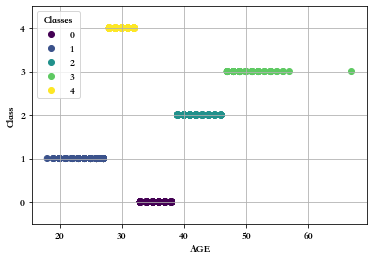

找 GAGE_TOTLE_PRICE 最合适的k值：
k = 2时，score = 1726.9242600311281
k = 3时，score = 2073.715067368992
k = 4时，score = 3062.7500659269326
k = 5时，score = 3696.0007568230194
最终找到的最佳k = 5，对应的max_score = 3696.0007568230194



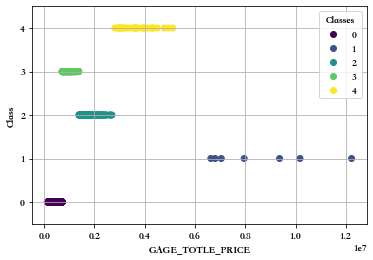

找 APPLY_AMOUNT 最合适的k值：
k = 2时，score = 1549.1561106918293
k = 3时，score = 2291.9221804399454
k = 4时，score = 2779.1180798001533
k = 5时，score = 3399.8635602964487
最终找到的最佳k = 5，对应的max_score = 3399.8635602964487



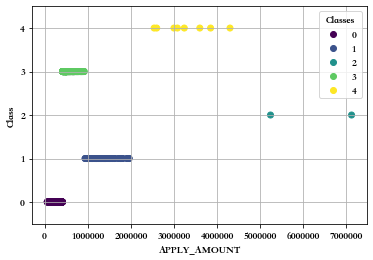

找 APPLY_TERM_TIME 最合适的k值：
k = 2时，score = 2818.150397276408
k = 3时，score = 5292.859344782355
k = 4时，score = 10075.971841927507
k = 5时，score = 22063.041573668695
最终找到的最佳k = 5，对应的max_score = 22063.041573668695



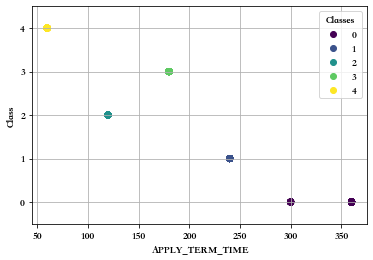

找 APPLY_INTEREST_RATE 最合适的k值：
k = 2时，score = 5002.090370245115
k = 3时，score = 11344.513738008218
k = 4时，score = 23648.838258102234
k = 5时，score = 22553.694120116303
最终找到的最佳k = 4，对应的max_score = 23648.838258102234



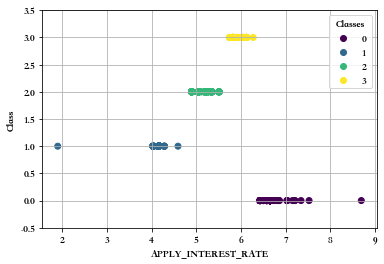

In [27]:
MAX_CLUSTER = 5
num_feature_list = ["AGE","GAGE_TOTLE_PRICE","APPLY_AMOUNT","APPLY_TERM_TIME","APPLY_INTEREST_RATE"]
k = []
for i in range(len(num_feature_list)):
    k.append(find_best_k(num_feature_list[i], MAX_CLUSTER))
    plot_cluster(k[i],num_feature_list[i])

In [26]:
def predict(k,feature):
    data = df[feature].copy()
    X = data.values.reshape((len(data),1))
    kmodel = KMeans(n_clusters = k, random_state=0, n_jobs = -1)
    y_pred = kmodel.fit_predict(X)
    return y_pred

In [35]:
for i in range(len(num_feature_list)):
    df[num_feature_list[i]] = predict(k[i],num_feature_list[i])
    print(df[num_feature_list[i]].value_counts(normalize=True,ascending=True))

3   0.05028
2   0.18980
1   0.21813
4   0.26558
0   0.27620
Name: AGE, dtype: float64
1   0.00496
4   0.02266
2   0.09278
3   0.36048
0   0.51912
Name: GAGE_TOTLE_PRICE, dtype: float64
2   0.00142
4   0.00567
1   0.05524
3   0.32153
0   0.61615
Name: APPLY_AMOUNT, dtype: float64
4   0.07507
0   0.15510
2   0.17918
3   0.20538
1   0.38527
Name: APPLY_TERM_TIME, dtype: float64
3   0.13456
0   0.18201
2   0.29391
1   0.38952
Name: APPLY_INTEREST_RATE, dtype: float64


GAGE_TOTLE_PRICE、APPLY_AMOUNT存在类取值过小的问题，下面考虑合并，合并目的是最终每个类大于5%，并且不能违反连续的原则。
- GAGE_TOTLE_PRICE中数目小的类1、4、2分别是取值最大、取值第二大、取值第三大的类，所以可以合并
- APPLY_AMOUNT中数目小的类2、4、1分别是取值最大、取值第二大、取值第三大的类，所以可以合并
下面执行合并

In [28]:
df["GAGE_TOTLE_PRICE"] = df["GAGE_TOTLE_PRICE"].apply(lambda x: 2 if (x ==1  or x == 4 or x == 2) else x)
df["APPLY_AMOUNT"] = df["APPLY_AMOUNT"].apply(lambda x: 1 if (x ==2  or x == 4 or x == 1) else x)

In [29]:
df["GAGE_TOTLE_PRICE"] = df["GAGE_TOTLE_PRICE"].apply(lambda x: 1 if (x == 3) else x)
df["APPLY_AMOUNT"] = df["APPLY_AMOUNT"].apply(lambda x: 2 if (x == 3) else x)

因为MONTHLY_INCOME_WHITHOUT_TAX异常值和缺失值已经单独分类了，所以其他数值最多只能聚为3类，下面尝试

k = 2时，score = 2230.061826101752
k = 3时，score = 2871.7198586676795
k = 4时，score = 3346.0210079620356
k = 5时，score = 4469.911497105354
最终找到的最佳k = 5，对应的max_score = 4469.911497105354



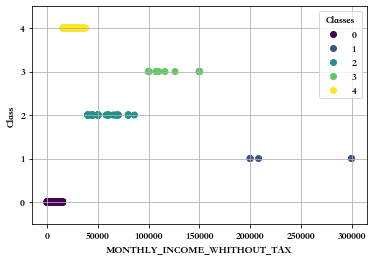

In [30]:
max_score = 0
best_k = 0
for i in [2,3,4,5]:
    data = df.loc[~df["MONTHLY_INCOME_WHITHOUT_TAX"].isin([-1,-2])]["MONTHLY_INCOME_WHITHOUT_TAX"].copy()
    X = data.values.reshape((len(data), 1))
    kmodel = KMeans(n_clusters = i, random_state=0)
    y_pred = kmodel.fit_predict(X)
    score = metrics.calinski_harabasz_score(X, y_pred)
    print(f"k = {i}时，score = {score}")
    if score > max_score:
        max_score = score
        best_k = i
print(f"最终找到的最佳k = {best_k}，对应的max_score = {max_score}\n")

fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], y_pred,c=y_pred)
plt.ylim(-0.5, best_k-0.5)
plt.grid()
plt.legend(*scatter.legend_elements(),loc="best", title="Classes")
plt.xlabel("MONTHLY_INCOME_WHITHOUT_TAX")
plt.ylabel('Class')
plt.show()

In [31]:
df["MONTHLY_INCOME_WHITHOUT_TAX"].loc[~df["MONTHLY_INCOME_WHITHOUT_TAX"].isin([-1,-2])] = y_pred

In [32]:
df["MONTHLY_INCOME_WHITHOUT_TAX"].value_counts(normalize=True)

0.00000    0.77125
4.00000    0.15793
2.00000    0.04108
3.00000    0.01062
-2.00000   0.00850
-1.00000   0.00708
1.00000    0.00354
Name: MONTHLY_INCOME_WHITHOUT_TAX, dtype: float64

分类之后，我们发现类1、-1、-2、2、3、4都占比低于5%，而类1的odds与类-2、-1、3的都较为接近，且不会造成跳跃，因为类3本身就是和类1相邻。所以我们将类1、-2、-1合并到类3中，见下。

In [33]:
check_merge_odds_nearest(df,"MONTHLY_INCOME_WHITHOUT_TAX",1)

待合并值 1 的odds = 0.0007087172218284905
取值 0.0 的odds = 0.5150214592274678，距离是0.5143127420056393
取值 4.0 的odds = 0.08615384615384615，距离是0.08544512893201767
取值 2.0 的odds = 0.023930384336475707，距离是0.023221667114647217
取值 3.0 的odds = 0.009292351679771264，距离是0.008583634457942774
取值 -2.0 的odds = 0.002840909090909091，距离是0.0021321918690806003
取值 -1.0 的odds = 0.00498220640569395，距离是0.004273489183865459


In [34]:
df["MONTHLY_INCOME_WHITHOUT_TAX"] = df["MONTHLY_INCOME_WHITHOUT_TAX"].apply(lambda x: 3 if (x ==1  or x == -1 or x == -2) else x)

我们发现还有类3和类2不足5%，那么先看类3的odds，发现与类2最接近，我们又想到之前合并进类3的类1是取值最大的，类3是原本第2大，类2是原本第3大，所以将新类3合并到类2不会造成跳跃，可以合并，见下

In [36]:
df["MONTHLY_INCOME_WHITHOUT_TAX"].value_counts(normalize=True)

0.00000   0.77125
4.00000   0.15793
2.00000   0.04108
3.00000   0.02975
Name: MONTHLY_INCOME_WHITHOUT_TAX, dtype: float64

In [37]:
check_merge_odds_nearest(df,"MONTHLY_INCOME_WHITHOUT_TAX",3)

待合并值 3 的odds = 0.01802451333813987
取值 0.0 的odds = 0.5150214592274678，距离是0.4969969458893279
取值 4.0 的odds = 0.08615384615384615，距离是0.06812933281570628
取值 2.0 的odds = 0.023930384336475707，距离是0.005905870998335838


In [38]:
df["MONTHLY_INCOME_WHITHOUT_TAX"] = df["MONTHLY_INCOME_WHITHOUT_TAX"].apply(lambda x: 2 if (x ==3) else x)

In [39]:
df["MONTHLY_INCOME_WHITHOUT_TAX"].value_counts(normalize=True)

0.00000   0.77125
4.00000   0.15793
2.00000   0.07082
Name: MONTHLY_INCOME_WHITHOUT_TAX, dtype: float64

最终MONTHLY_INCOME_WHITHOUT_TAX分为3类，为了好看，下面命名为0、1、2

In [40]:
df["MONTHLY_INCOME_WHITHOUT_TAX"] = df["MONTHLY_INCOME_WHITHOUT_TAX"].apply(lambda x: 1 if (x == 4) else x)

In [41]:
df["MONTHLY_INCOME_WHITHOUT_TAX"].value_counts(normalize=True)

0.00000   0.77125
1.00000   0.15793
2.00000   0.07082
Name: MONTHLY_INCOME_WHITHOUT_TAX, dtype: float64

In [42]:
df.head()

,ID,Label,AGE,GENDER,MARITAL_STATUS,MONTHLY_INCOME_WHITHOUT_TAX,LOANTYPE,GAGE_TOTLE_PRICE,APPLY_AMOUNT,APPLY_TERM_TIME,APPLY_INTEREST_RATE,PAYMENT_TYPE
0,1,1,1,0,0,1.00000,0,0,0,4,2,0
1,2,1,1,0,1,0.00000,0,0,0,4,3,0
2,3,1,1,0,1,1.00000,1,3,3,4,2,0
3,4,0,1,0,2,1.00000,0,3,3,4,1,0
4,5,0,1,0,2,1.00000,0,3,3,4,2,0


In [43]:
df.to_csv('../data/preprocess.csv',float_format = '%.0f',index=False)